# Pose Estimate

어플 상 화면 : 카메라가 받은 FPS로 그대로 출력

Pose Estimate : FPS 2 단위로 알로리즘 추출 후 특정 자세 추출시 촬영 수행

## Library Import

In [1]:
import cv2
import numpy as np
import time
import os
import math

## Configurations

In [2]:
# fashion_pose.py : MPII를 사용한 신체부위 검출


# MPII에서 각 파트 번호, 선으로 연결될 POSE_PAIRS
BODY_PARTS = { "Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
                "Background": 15 }

POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
                ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
                ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
                ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]
    
# 각 파일 path
protoFile = "model&weight/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "model&weight/pose/mpi/pose_iter_160000.caffemodel"

 
# 위의 path에 있는 network 불러오기
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


## Pose Estimate Model

In [3]:
def pose_estimate(frame):

    # frame.shape = 불러온 이미지에서 height, width, color 받아옴
    inWidth = 368
    inHeight = 368
    frameHeight, frameWidth, _ = frame.shape

    # network에 넣기위해 전처리
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

    # network에 넣어주기
    net.setInput(inpBlob)

    # 결과 받아오기
    output = net.forward()

    # output.shape[0] = 이미지 ID, [1] = 출력 맵의 높이, [2] = 너비
    H = output.shape[2]
    W = output.shape[3]

    # 키포인트 검출시 이미지에 그려줌
    points = []
    for i in range(0,15):
        # 해당 신체부위 신뢰도 얻음.
        probMap = output[0, i, :, :]

        # global 최대값 찾기
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

        # 원래 이미지에 맞게 점 위치 변경
        x = (frameWidth * point[0]) / W
        y = (frameHeight * point[1]) / H

        # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가, 검출했는데 부위가 없으면 None으로    
        if prob > 0.1 :    
            cv2.circle(frame, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)       # circle(그릴곳, 원의 중심, 반지름, 색)
            cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            points.append((int(x), int(y)))
        else :
            points.append(None)

    # 이미지 복사
    frameCopy = frame

    degList = calculate_degree(point_1=points[5], point_2=points[6], point_3=points[7], frame=frameCopy)
    
    # 각 POSE_PAIRS별로 선 그어줌 (머리 - 목, 목 - 왼쪽어깨, ...)
    for pair in POSE_PAIRS:
        partA = pair[0]             # Head
        partA = BODY_PARTS[partA]   # 0
        partB = pair[1]             # Neck
        partB = BODY_PARTS[partB]   # 1        

        #print(partA," 와 ", partB, " 연결\n")
        if points[partA] and points[partB]:
            cv2.line(frameCopy, points[partA], points[partB], (0, 255, 0), 2)
            
    return frameCopy, degList


## Utilities

In [4]:
def calculate_degree(point_1, point_2, point_3, frame):
    # 역탄젠트 구하기
    dx1 = point_2[0] - point_1[0]
    dy1 = point_2[1] - point_1[1]
    #rad = math.atan2(abs(dy), abs(dx))
    rad1 = math.atan2(dy1, dx1)
    # radian 을 degree 로 변환
    deg1 = rad1 * 180 / math.pi
    
    dx2 = point_3[0] - point_2[0]
    dy2 = point_3[1] - point_2[1]
    #rad = math.atan2(abs(dy), abs(dx))
    rad2 = math.atan2(dy2, dx2)
    # radian 을 degree 로 변환
    deg2 = rad2 * 180 / math.pi
    
    print(deg2 - deg1)
    return deg2 - deg1

#     # degree 가 45'보다 작으면 허리가 숙여졌다고 판단
#     if deg < 45:
#         string = "Bend Down"
#         cv2.putText(frame, string, (0, 25), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255))
#         print(f"[degree] {deg} ({string})")
#     else:
#         string = "Stand"
#         cv2.putText(frame, string, (0, 25), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255))
#         print(f"[degree] {deg} ({string})")

In [ ]:
def CrossedArm():
    

In [ ]:
def handsUp():

In [ ]:
def meditation():

In [82]:
oslist = os.listdir('../2.data/0.dataset/crossedArm/')
listDeg = []
for i in oslist:
    frame = cv2.imread('../2.data/0.dataset/crossedArm/' +i)
    frame, deglist = pose_estimate(frame)
    print(i)
    listDeg.append(deglist)

-248.7105619193482
crossedArm1.jpg
-250.11881293095612
crossedArm10.jpg
-257.2756443145777
crossedArm11.jpg
70.164267922549
crossedArm13.jpg
-255.08976297673075
crossedArm14.jpg
-262.5024493405063
crossedArm15.jpg
79.43038256146626
crossedArm16.jpg
104.71397693355533
crossedArm17.jpg
99.34467190209969
crossedArm19.jpg
-257.93511558947455
crossedArm3.jpg
90.0
crossedArm5.jpg
-264.52628576790266
crossedArm6.jpg
-242.6222972286683
crossedArm7.jpg


AttributeError: 'NoneType' object has no attribute 'shape'

In [93]:
# FPS 측정
start = time.time()
print('time :', time.time() - start)

time : 0.0


In [5]:
# 웹캠를 구동하여 pose estimation을 수행하는 함수

def showWebcam(FPS):

    try:
        print('카메라를 구동합니다.')
        cap = cv2.VideoCapture(0) # VideoCapture 객체 생성 -> 구동할 장치 번호 입력(캠이 하나임으로 0번)
    except:                      # 만약 캠구동이 아니라 저장된 파일을 재생하기 원할 시, 경로와 파일이름 입력
        print('카메라 구동 실패')
        return

    cap.set(3, 480) # 프레임 크기 설정
    cap.set(4, 320)    
    prev_time = 0
    
    while True:
        ret, frame = cap.read() # 재생되는 비디오를 한 프레임씩 읽기 
        frame = cv2.flip(frame, 1) # 제대로 읽을 시에 ret : True or False, frame : 읽은 프레임
        current_time = time.time() - prev_time
        
        if not ret:
            print('비디오 읽기 오류')
            break
        
        framePose = pose_estimate(frame)
        
        if (ret is True) and (current_time > 1./ FPS) :
            prev_time = time.time()
            cv2.imshow('video', framePose) # 변환한 프레임을 화면에 디스플레이
        
        
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            print('카메라 구동을 종료합니다.')
            break
    
    cap.release() # 오픈한 cap 객체 해제 **** 필수 ****
    cv2.destroyAllWindows() # 윈도우 창 답기

In [10]:
# 저장된 이미지에 pose estimation을 수행하는 함수

def imshow(images):
#     try:
#         frame = cv2.imread(images)
#         framePose = pose_estimate(frame)
#         cv2.imshow(images, framePose)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
#     except:
#         print(images)
    frame = cv2.imread(images)
    framePose = pose_estimate(frame)
    cv2.imshow(images, framePose)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
# 저장된 비디오에 pose estimation을 수행하는 함수

def showVideo(input_source):
    cap = cv2.VideoCapture(input_source)

    while True:
        ret, frame = cap.read() # 재생되는 비디오를 한 프레임씩 읽기 
        frame = cv2.flip(frame, 1) # 제대로 읽을 시에 ret : True or False, frame : 읽은 프레임

        if not ret:
            print('비디오 읽기 오류')
            break

        framePose = pose_estimate(frame)

        cv2.imshow('video', framePose) # 변환한 프레임을 화면에 디스플레이

        k = cv2.waitKey(1)
        if k == 27: break


## Run

In [97]:
showWebcam(2)

카메라를 구동합니다.
카메라 구동을 종료합니다.


In [12]:
imshow('../2.data/0.dataset/crossedArm/crossedArm1.jpg')

-248.7105619193482


TypeError: Expected Ptr<cv::UMat> for argument 'mat'

In [63]:
#imshow('../2.data/0.dataset/crossedArm/istockphoto-1092806334-1024x1024.jpg')
oslist = os.listdir('../2.data/0.dataset/crossedArm/')
for i in oslist:
    imshow('../2.data/0.dataset/crossedArm/' +i)

(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44292862436333
(191, 165) (221, 187) 36.25383773744479
(191, 165) (154, 176) 163.44

(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285, 271) 164.33789365467393
(392, 241) (516, 271) 13.600542516658743
(392, 241) (285,

(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30911037996668
(673, 406) (766, 443) 21.69510946079689
(673, 406) (557, 443) 162.30

In [100]:
showVideo('../2.data/0.dataset/test.mp4')

In [89]:
# pose_estimation 결과물 생성 및 저장
path = '../2.data/0.dataset/'
path_list = ['crossedArm','handsup','meditation','Siuuuu']

for i in path_list:
    oslist = os.listdir(path + i)
    for j in oslist:
        frame = cv2.imread(path + i + '/' + j)
        framePose = pose_estimate(frame)
        cv2.imwrite(path + 'result/' + j,frame)

## dataset rename

In [84]:
i = 1
path = '../2.data/0.dataset/'
path_list = ['crossedArm','handsup','meditation','Siuuuu']
    
def changeName(path, cName):
    i = 1
    for filename in os.listdir(path):
        print(path+'/'+filename, '=>', path+'/'+str(cName)+str(i)+'.jpg')
        os.rename(path+'/'+filename, path+'/'+str(cName)+str(i)+'.jpg')
        i += 1

for j in path_list:
    changeName(path + j,j)


../2.data/0.dataset/handsup/103964500-studio-shot-of-a-young-woman-in-a-bikini-isolated-on-white-having-her-hands-up-in-the-air-like-prese.jpg => ../2.data/0.dataset/handsup/handsup1.jpg
../2.data/0.dataset/handsup/56924852-young-woman-raising-hands-in-hawaii-ready-to-go-snorkeling.jpg => ../2.data/0.dataset/handsup/handsup2.jpg
../2.data/0.dataset/handsup/657326.jpg => ../2.data/0.dataset/handsup/handsup3.jpg
../2.data/0.dataset/handsup/83755524-women-raise-her-both-hands-up.jpg => ../2.data/0.dataset/handsup/handsup4.jpg
../2.data/0.dataset/handsup/8958613_stock-photo-casual-man-standing-with-hands-in-the-air-pointing-up.jpg => ../2.data/0.dataset/handsup/handsup5.jpg
../2.data/0.dataset/handsup/a-young-happy-woman-stands-with-her-hands-in-the-air-XDY0AG.jpg => ../2.data/0.dataset/handsup/handsup6.jpg
../2.data/0.dataset/handsup/a20723a42e454bcdc77a7ddae7b5510e.jpg => ../2.data/0.dataset/handsup/handsup7.jpg
../2.data/0.dataset/handsup/depositphotos_70489547-stock-photo-cheerful-man-

# YOLOv3 using Tensorflow2

## Library Import

In [101]:
import numpy as np
import pandas as pd
import cv2, os, glob
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import (
    Add, Concatenate, Conv2D,
    Input, Lambda, LeakyReLU,
    MaxPool2D, UpSampling2D, ZeroPadding2D
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import (
    binary_crossentropy,
    sparse_categorical_crossentropy
)
from tensorflow.keras.utils import plot_model

from yolo_utilities import *
from yolo_model import *

## Configurations

In [102]:
yolo_anchors = np.array([
    (10, 13), (16, 30), (33, 23), (30, 61), (62, 45),
    (59, 119), (116, 90), (156, 198), (373, 326)],
    np.float32) / 416

yolo_anchor_masks = np.array([[6, 7, 8], [3, 4, 5], [0, 1, 2]])

yolo_tiny_anchors = np.array([
    (10, 14), (23, 27), (37, 58),
    (81, 82), (135, 169), (344, 319)],
    np.float32) / 416

yolo_tiny_anchor_masks = np.array([[3, 4, 5], [0, 1, 2]])

class_names = [
    'person', 'bicycle','car','motorbike','aeroplane','bus','train','truck','boat',
    'traffic light','fire hydrant','stop sign','parking meter','bench',
    'bird','cat','dog','horse','sheep','cow','elephant','bear','zebra',
    'giraffe','backpack','umbrella','handbag','tie','suitcase','frisbee',
    'skis','snowboard','sports ball','kite','baseball bat','baseball glove',
    'skateboard','surfboard','tennis racket','bottle','wine glass','cup',
    'fork','knife','spoon','bowl','banana','apple','sandwich','orange',
    'broccoli','carrot','hot dog','pizza','donut','cake','chair','sofa',
    'pottedplant','bed','diningtable','toilet','tvmonitor','laptop','mouse',
    'remote','keyboard','cell phone','microwave','oven','toaster','sink',
    'refrigerator','book','clock','vase','scissors','teddy bear',
    'hair drier','toothbrush'
]

## Model & Loss

In [103]:
def YoloV3(size=None, channels=3, anchors=yolo_anchors, masks=yolo_anchor_masks, classes=80, training=False):
    # 이미지 사이즈와 채널 맞추어서 input데이터로 입력
    x = inputs = Input([size, size, channels])
    x_36, x_61, x = Darknet(name='yolo_darknet')(x)
    x = YoloConv(512, name='yolo_conv_0')(x)
    output_0 = YoloOutput(512, len(masks[0]), classes, name='yolo_output_0')(x)
    x = YoloConv(256, name='yolo_conv_1')((x, x_61))
    output_1 = YoloOutput(256, len(masks[1]), classes, name='yolo_output_1')(x)
    x = YoloConv(128, name='yolo_conv_2')((x, x_36))
    output_2 = YoloOutput(128, len(masks[2]), classes, name='yolo_output_2')(x)
    if training:
        return Model(inputs, (output_0, output_1, output_2), name='yolov3')
        # True로 잡을시에 predict 아웃풋값이 3개만 나옴
    boxes_0 = Lambda(lambda x: yolo_boxes(x, anchors[masks[0]], classes),
                     name='yolo_boxes_0')(output_0)
    boxes_1 = Lambda(lambda x: yolo_boxes(x, anchors[masks[1]], classes),
                     name='yolo_boxes_1')(output_1)
    boxes_2 = Lambda(lambda x: yolo_boxes(x, anchors[masks[2]], classes),
                     name='yolo_boxes_2')(output_2)
    outputs = Lambda(lambda x: yolo_nms(x, anchors, masks, classes),
                     name='yolo_nms')((boxes_0[:3], boxes_1[:3], boxes_2[:3]))
    return Model(inputs, outputs, name='yolov3')
            # inputs : 사이즈와 채널수
            # outputs : 


def YoloV3Tiny(size=None, channels=3, anchors=yolo_tiny_anchors, masks=yolo_tiny_anchor_masks, classes=80, training=False):
    x = inputs = Input([size, size, channels])
    x_8, x = DarknetTiny(name='yolo_darknet')(x)
    x = YoloConvTiny(256, name='yolo_conv_0')(x)
    output_0 = YoloOutput(256, len(masks[0]), classes, name='yolo_output_0')(x)
    x = YoloConvTiny(128, name='yolo_conv_1')((x, x_8))
    output_1 = YoloOutput(128, len(masks[1]), classes, name='yolo_output_1')(x)
    if training:
        return Model(inputs, (output_0, output_1), name='yolov3')
    boxes_0 = Lambda(lambda x: yolo_boxes(x, anchors[masks[0]], classes),
                     name='yolo_boxes_0')(output_0)
    boxes_1 = Lambda(lambda x: yolo_boxes(x, anchors[masks[1]], classes),
                     name='yolo_boxes_1')(output_1)
    outputs = Lambda(lambda x: yolo_nms(x, anchors, masks, classes),
                     name='yolo_nms')((boxes_0[:3], boxes_1[:3]))
    return Model(inputs, outputs, name='yolov3_tiny')


def YoloLoss(anchors, classes=80, ignore_thresh=0.5):
    def yolo_loss(y_true, y_pred):
        # 1. transform all pred outputs
        # y_pred: (batch_size, grid, grid, anchors, (x, y, w, h, obj, ...cls))
        pred_box, pred_obj, pred_class, pred_xywh = yolo_boxes(y_pred, anchors, classes)
        pred_xy = pred_xywh[..., 0:2]
        pred_wh = pred_xywh[..., 2:4]
        # 2. transform all true outputs
        # y_true: (batch_size, grid, grid, anchors, (x1, y1, x2, y2, obj, cls))
        true_box, true_obj, true_class_idx = tf.split(
            y_true, (4, 1, 1), axis=-1)
        true_xy = (true_box[..., 0:2] + true_box[..., 2:4]) / 2
        true_wh = true_box[..., 2:4] - true_box[..., 0:2]
        # give higher weights to small boxes
        box_loss_scale = 2 - true_wh[..., 0] * true_wh[..., 1]
        # 3. inverting the pred box equations
        grid_size = tf.shape(y_true)[1]
        grid = tf.meshgrid(tf.range(grid_size), tf.range(grid_size))
        grid = tf.expand_dims(tf.stack(grid, axis=-1), axis=2)
        true_xy = true_xy * tf.cast(grid_size, tf.float32) - \
            tf.cast(grid, tf.float32)
        true_wh = tf.math.log(true_wh / anchors)
        true_wh = tf.where(tf.math.is_inf(true_wh), tf.zeros_like(true_wh), true_wh)
        # 4. calculate all masks
        obj_mask = tf.squeeze(true_obj, -1)
        # ignore false positive when iou is over threshold
        true_box_flat = tf.boolean_mask(true_box, tf.cast(obj_mask, tf.bool))
        best_iou = tf.reduce_max(broadcast_iou(
            pred_box, true_box_flat), axis=-1)
        ignore_mask = tf.cast(best_iou < ignore_thresh, tf.float32)
        # 5. calculate all losses
        xy_loss = obj_mask * box_loss_scale * \
            tf.reduce_sum(tf.square(true_xy - pred_xy), axis=-1)
        wh_loss = obj_mask * box_loss_scale * \
            tf.reduce_sum(tf.square(true_wh - pred_wh), axis=-1)
        obj_loss = binary_crossentropy(true_obj, pred_obj)
        obj_loss = obj_mask * obj_loss + \
            (1 - obj_mask) * ignore_mask * obj_loss
        # Could also use binary_crossentropy instead
        class_loss = obj_mask * sparse_categorical_crossentropy(
            true_class_idx, pred_class)
        # 6. sum over (batch, gridx, gridy, anchors) => (batch, 1)
        xy_loss = tf.reduce_sum(xy_loss, axis=(1, 2, 3))
        wh_loss = tf.reduce_sum(wh_loss, axis=(1, 2, 3))
        obj_loss = tf.reduce_sum(obj_loss, axis=(1, 2, 3))
        class_loss = tf.reduce_sum(class_loss, axis=(1, 2, 3))
        return xy_loss + wh_loss + obj_loss + class_loss
    return yolo_loss

## Model & Weight load

In [104]:
yolo = YoloV3(classes = 80)

yolo.summary()
# plot_model(
#     yolo, rankdir = 'TB',
#     to_file = 'yolo_model.png',
#     show_shapes = False,
#     show_layer_names = True,
#     expand_nested = True
# )

Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
yolo_darknet (Functional)       ((None, None, None,  40620640    input_1[0][0]                    
__________________________________________________________________________________________________
yolo_conv_0 (Functional)        (None, None, None, 5 11024384    yolo_darknet[0][2]               
__________________________________________________________________________________________________
yolo_conv_1 (Functional)        (None, None, None, 2 2957312     yolo_conv_0[0][0]                
                                                                 yolo_darknet[0][1]          

In [105]:
# yolo weight를 로드해주는 코드
# 모델, weight 경로, Tiny 여부

load_darknet_weights(yolo, './model&weight/yolov3/yolov3.weights', False)

In [106]:
# 인풋이미지를 디택팅 이후 그림을 그려주는 함수

# 이미지 인풋하기
# image_file : 파일 경로 및 이름 넣기
# visualize : 화면에 띄우기 여부
# figsize : 그림 크기

def predict(image_file, visualize = True, figsize = (16, 16)):
    img = tf.image.decode_image(open(image_file, 'rb').read(), channels=3)
    
    img = tf.expand_dims(img, 0)
    img = transform_images(img, 416)
    boxes, scores, classes, nums = yolo.predict(img)
    img = cv2.cvtColor(cv2.imread(image_file), cv2.COLOR_BGR2RGB)
    img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
    if visualize:
        fig, axes = plt.subplots(figsize = figsize)
        plt.imshow(img)
        plt.show()
    return boxes, scores, classes, nums

## Run

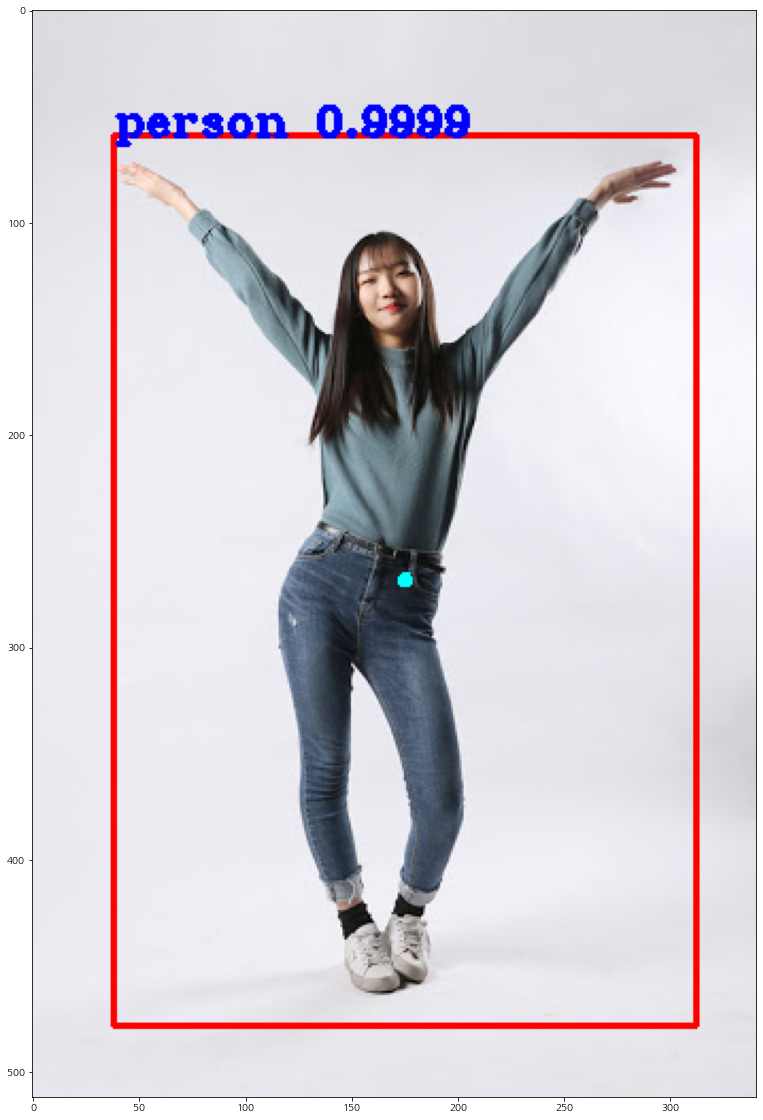

In [49]:
boxes, scores, classes, nums = predict('images/single1.jpg',figsize = (20, 20))

In [107]:
# 저장된 비디오에 Yolo를 수행하는 함수

def showVideo(input_source):
    cap = cv2.VideoCapture(input_source)

    while True:
        ret, frame = cap.read() # 재생되는 비디오를 한 프레임씩 읽기
        #frame = cv2.flip(frame, 1) # 제대로 읽을 시에 ret : True or False, frame : 읽은 프레임

        if not ret:
            print('비디오 읽기 오류')
            break

        img = tf.constant(frame)
        img = tf.expand_dims(img, 0)
        img = transform_images(img, 416)
        boxes, scores, classes, nums = yolo.predict(img)

        img = draw_outputs(frame, (boxes, scores, classes, nums), class_names)
        img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        #boxes, scores, classes, nums, img = predict(frame,figsize = (20, 20))

        cv2.namedWindow('video', cv2.WINDOW_NORMAL)
        cv2.imshow('video', img) # 변환한 프레임을 화면에 디스플레이

        k = cv2.waitKey(1)
        if k == 27: break


In [108]:
showVideo('./images/road.mp4')

UnknownError: 2 root error(s) found.
  (0) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node yolov3/yolo_darknet/conv2d/Conv2D (defined at <ipython-input-107-4d36cb95921e>:17) ]]
  (1) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node yolov3/yolo_darknet/conv2d/Conv2D (defined at <ipython-input-107-4d36cb95921e>:17) ]]
	 [[yolov3/yolo_nms/Reshape_9/_16]]
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_8725]

Function call stack:
predict_function -> predict_function
